In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [25]:
analysis = scripts.Analysis()

In [26]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_10',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_2__2__6',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_.8_.4__all.4__all.4',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_saw')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [27]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_10',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_2__2__6',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_.8_.4__all.4__all.4',
                          'bigsum',
                          'mdc_0501_792d11',
                          'atmpro_saw')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [28]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 10 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [29]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [30]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [31]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [32]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 257.0

ng = 10

nref = 3

p_refs = (/ 1,  10, 500 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 2,   2,   6 /)

data wgt
     &     /9*.4, .8/

planck_wgt_flux = 2

include 'saw75.pro'


In [33]:
fig.display_hrefanchor()

In [34]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [35]:
table_dgdgs.display_hrefanchor()

In [36]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [37]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [38]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

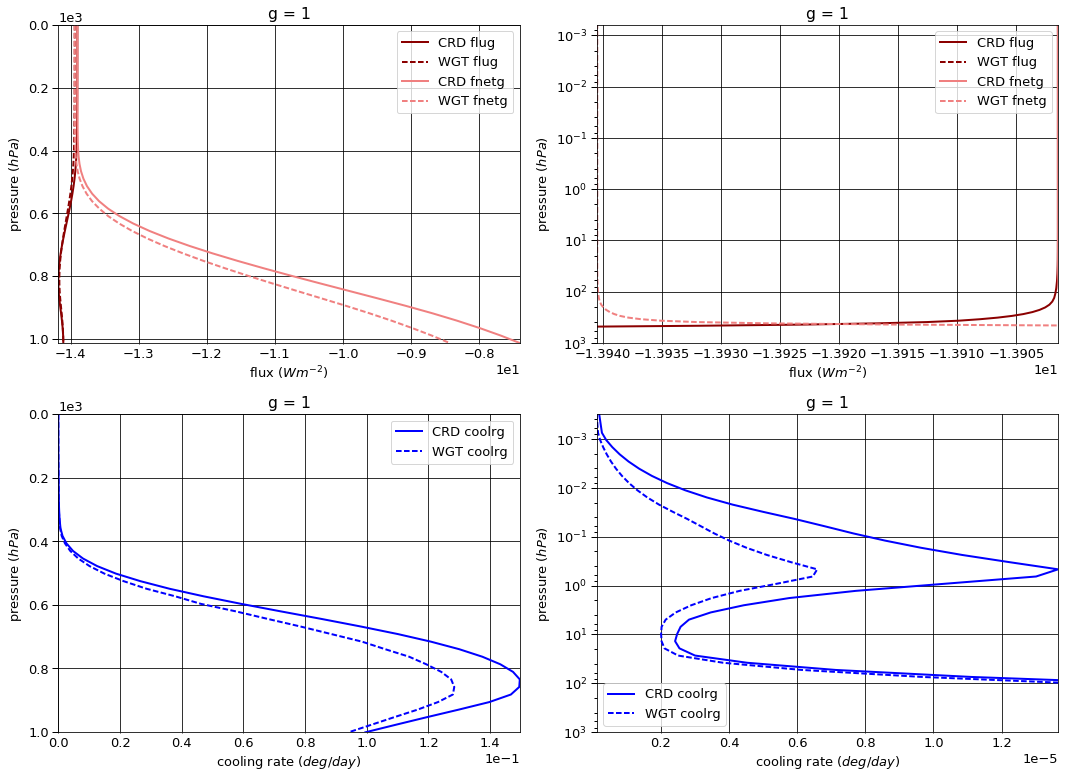

# Figure: flux, cooling rate g-group 2

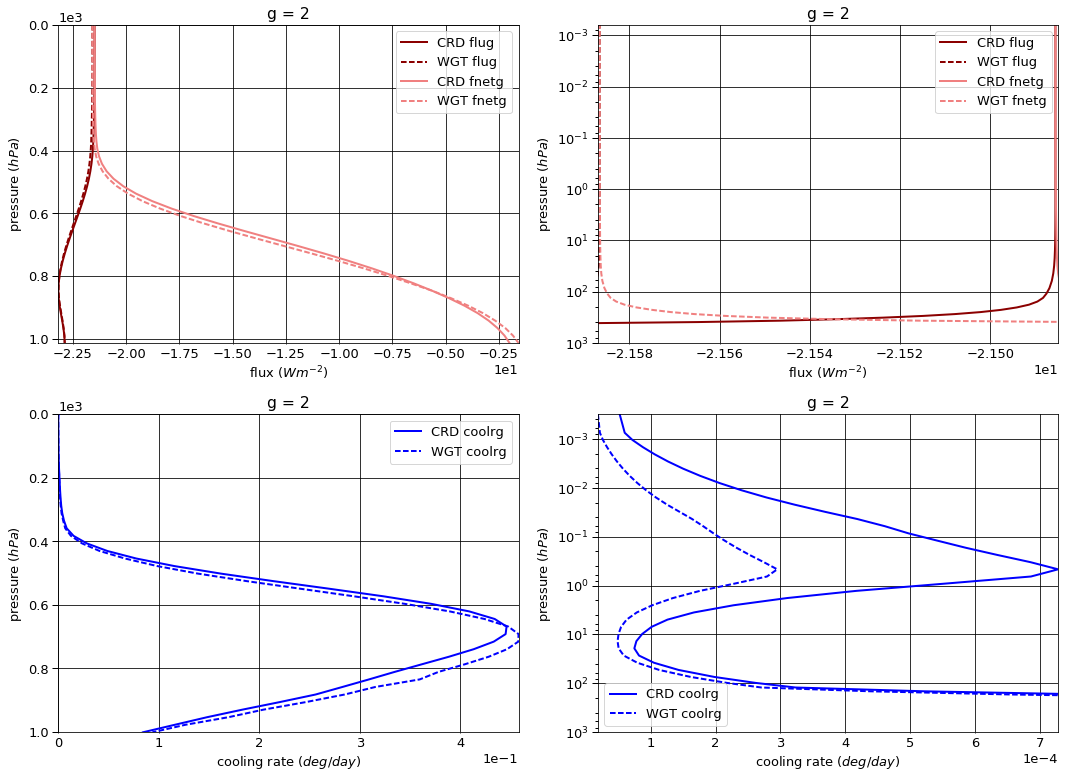

# Figure: flux, cooling rate g-group 3

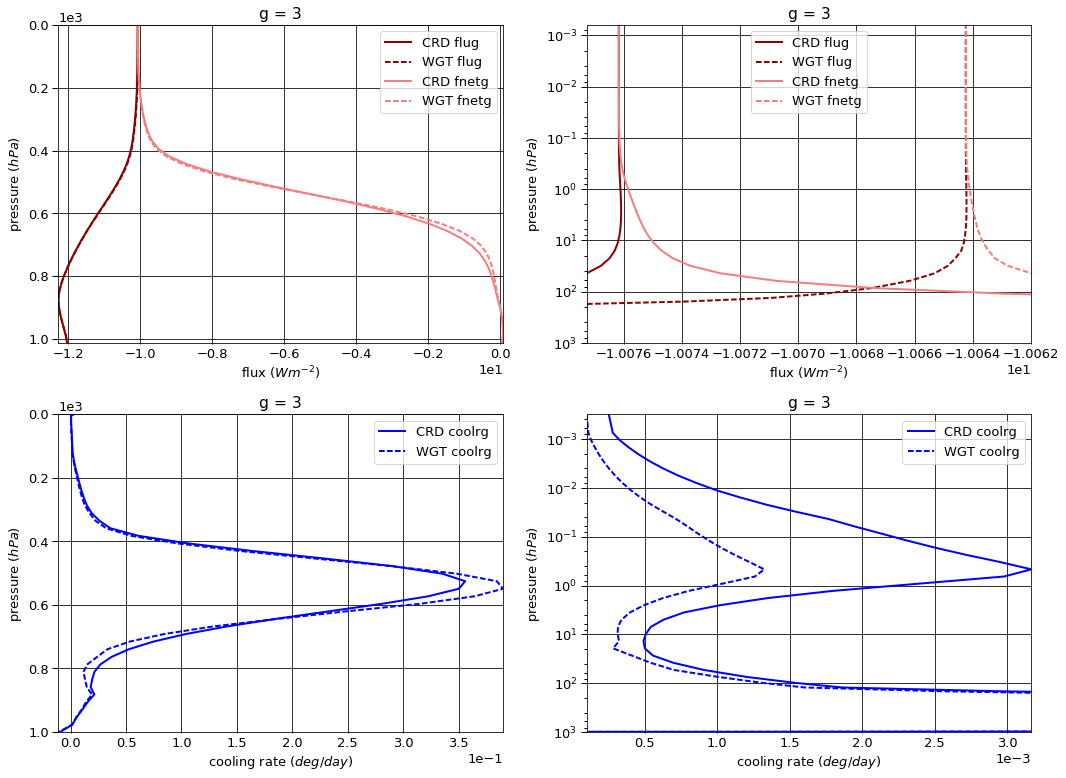

# Figure: flux, cooling rate g-group 4

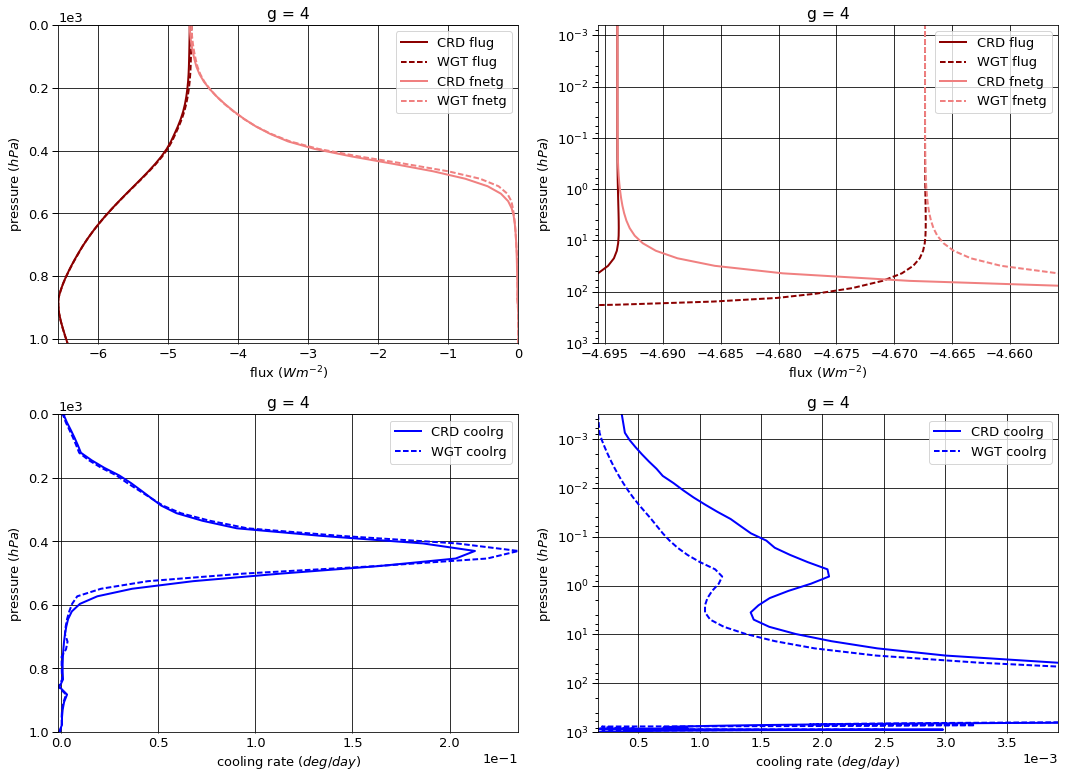

# Figure: flux, cooling rate g-group 5

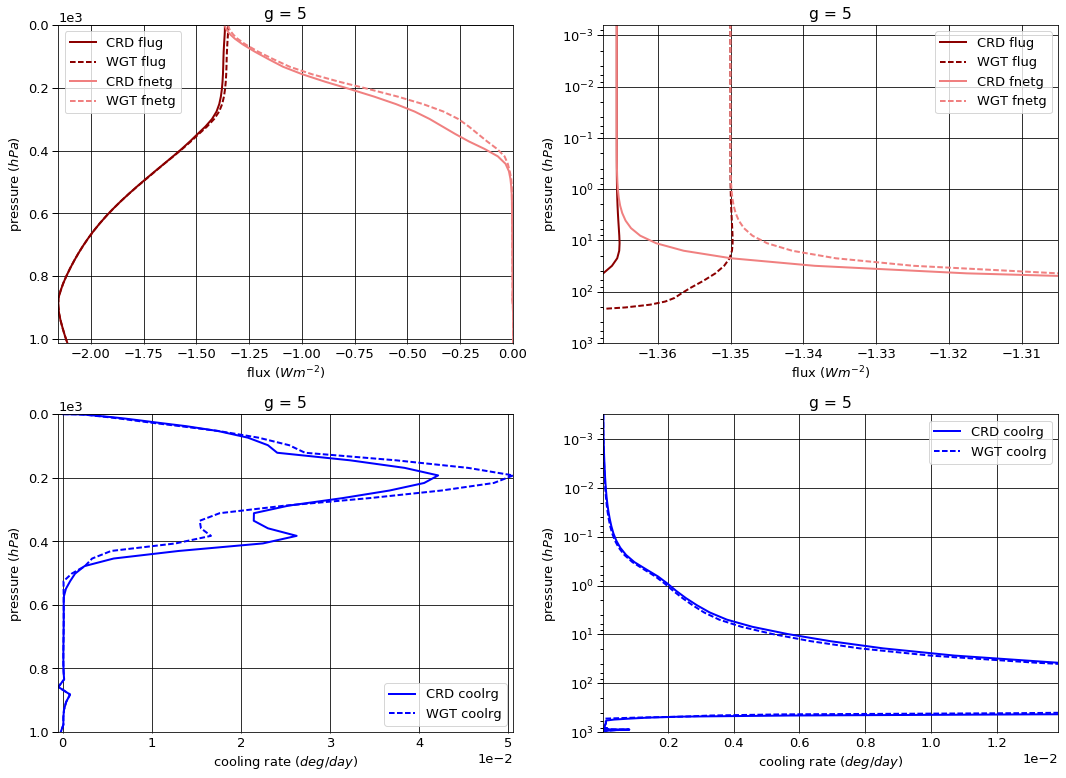

# Figure: flux, cooling rate g-group 6

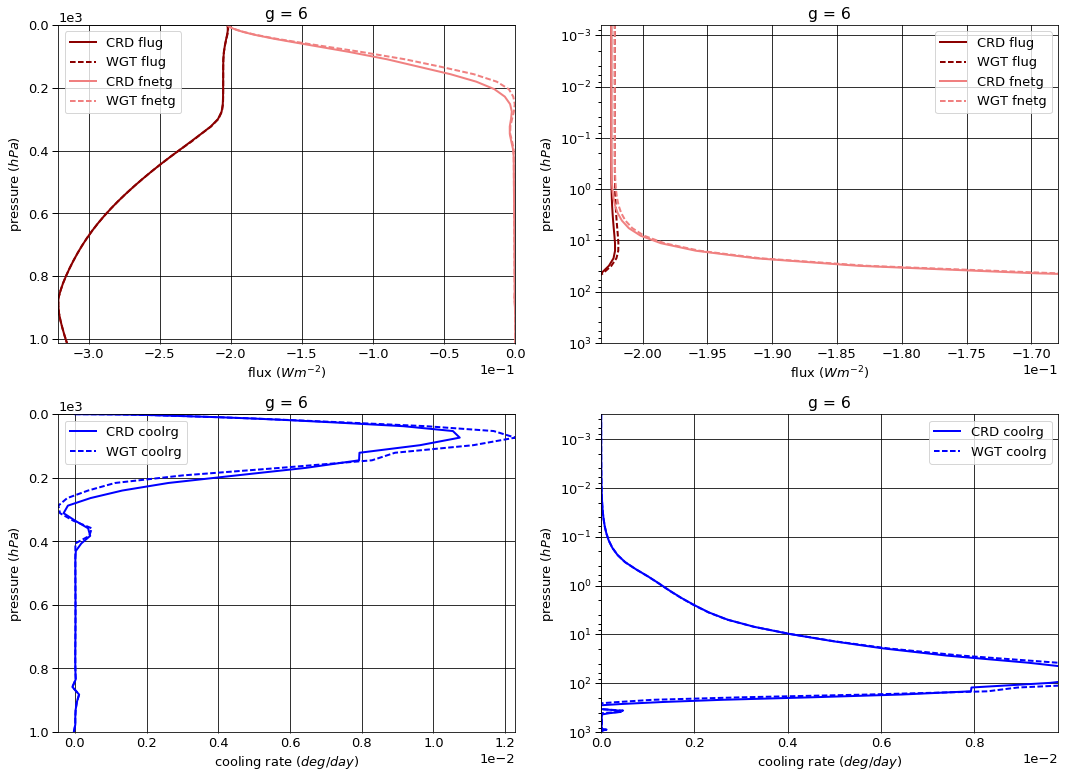

# Figure: flux, cooling rate g-group 7

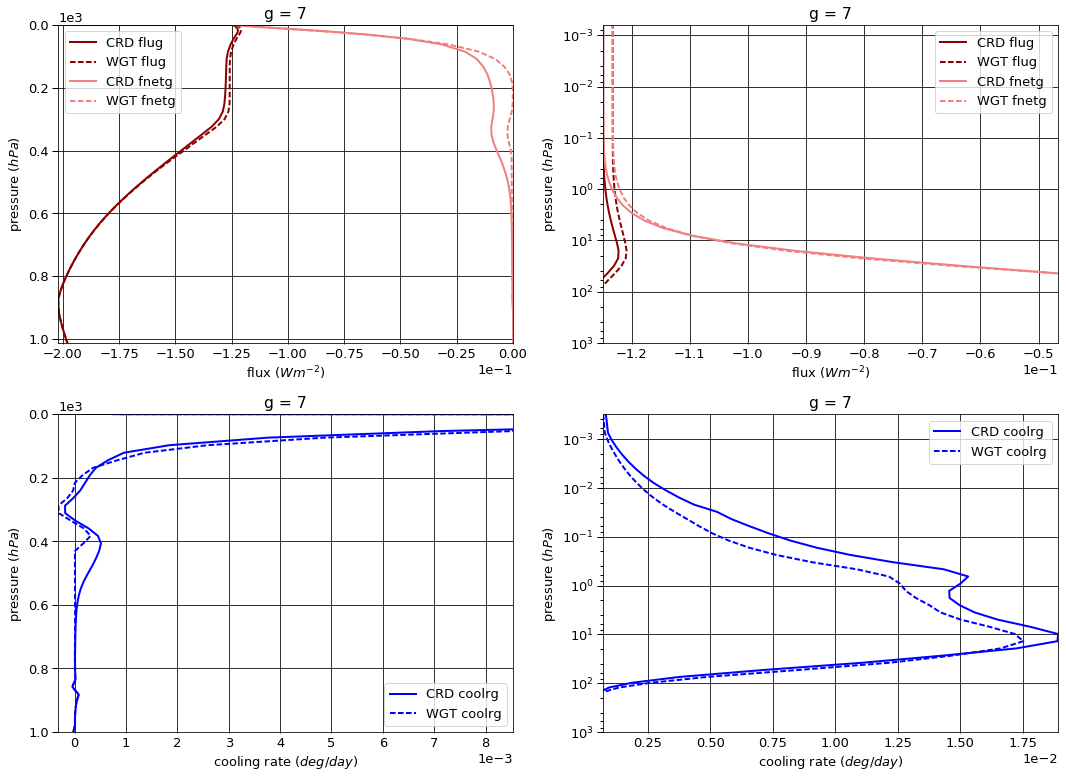

# Figure: flux, cooling rate g-group 8

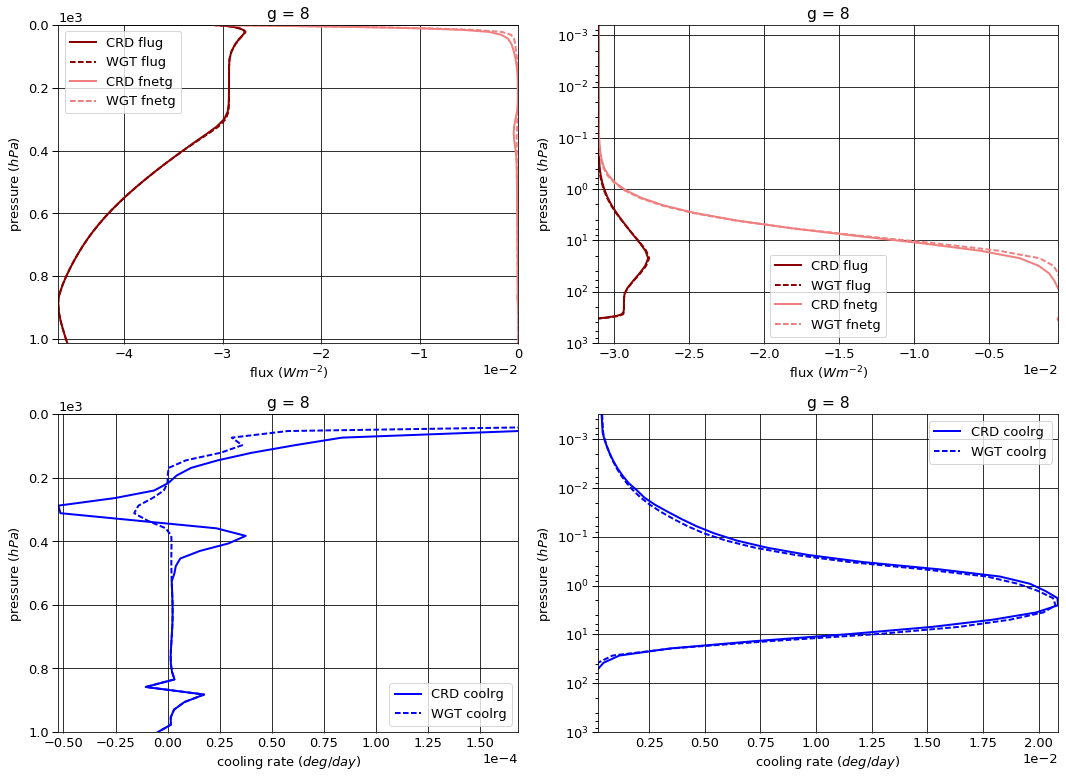

# Figure: flux, cooling rate g-group 9

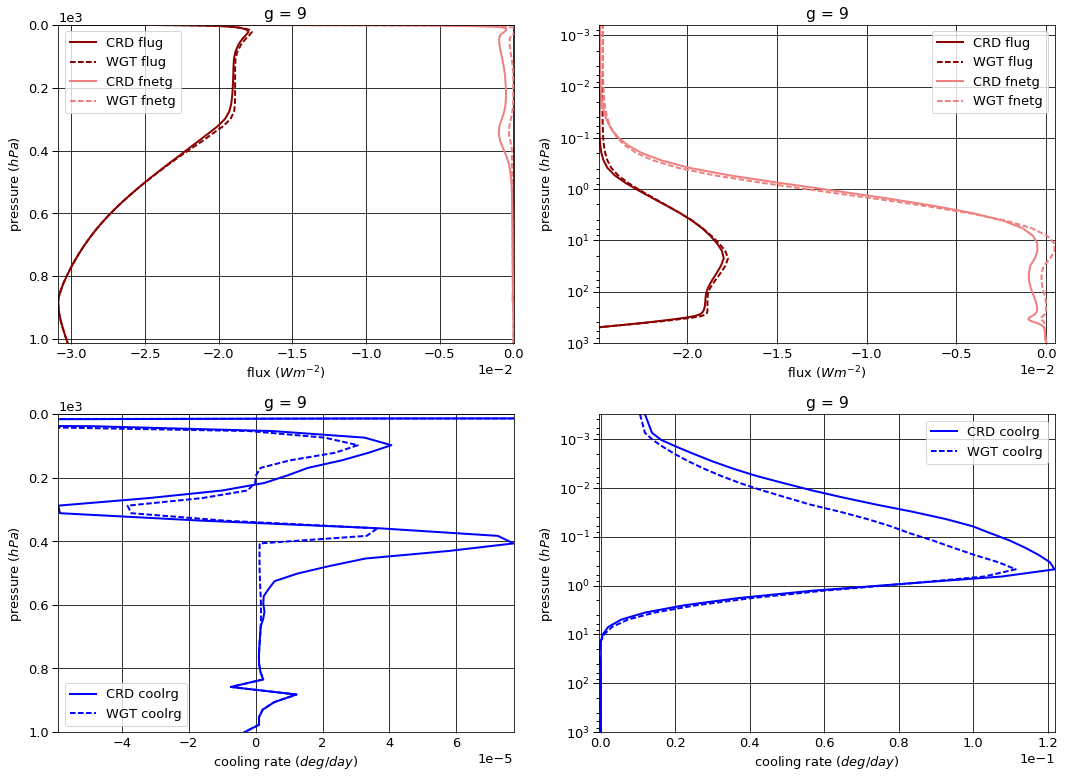

# Figure: flux, cooling rate g-group 10

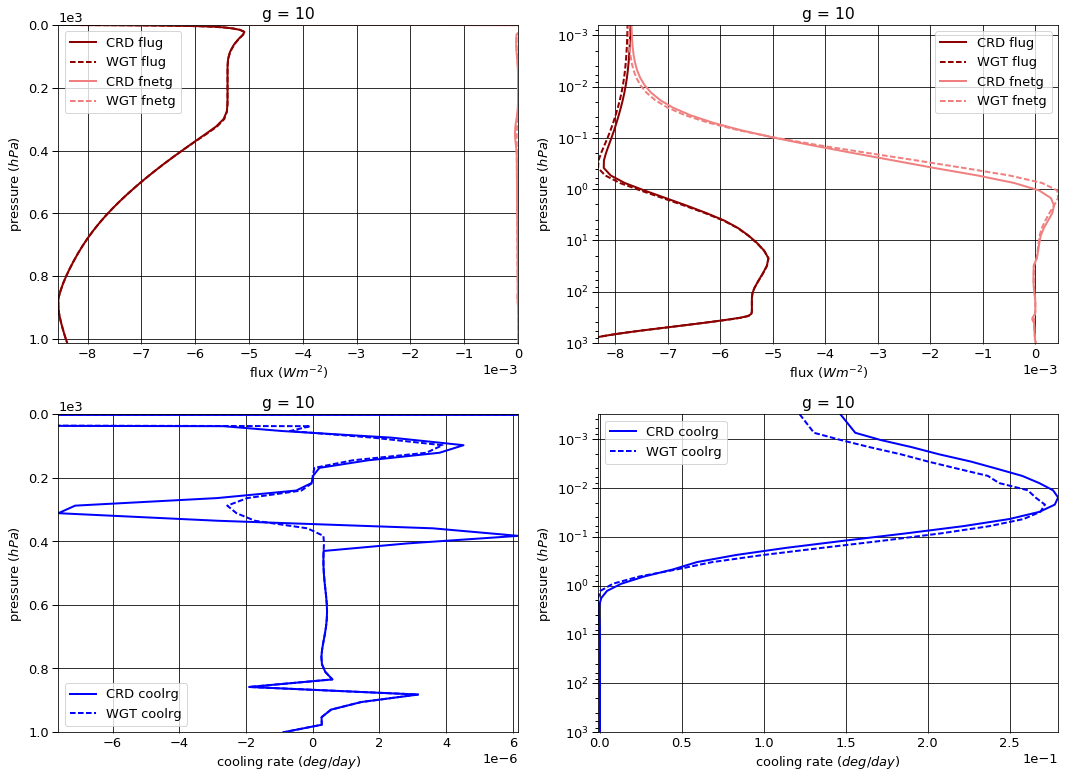

# Figure: flux, cooling rate g-group total

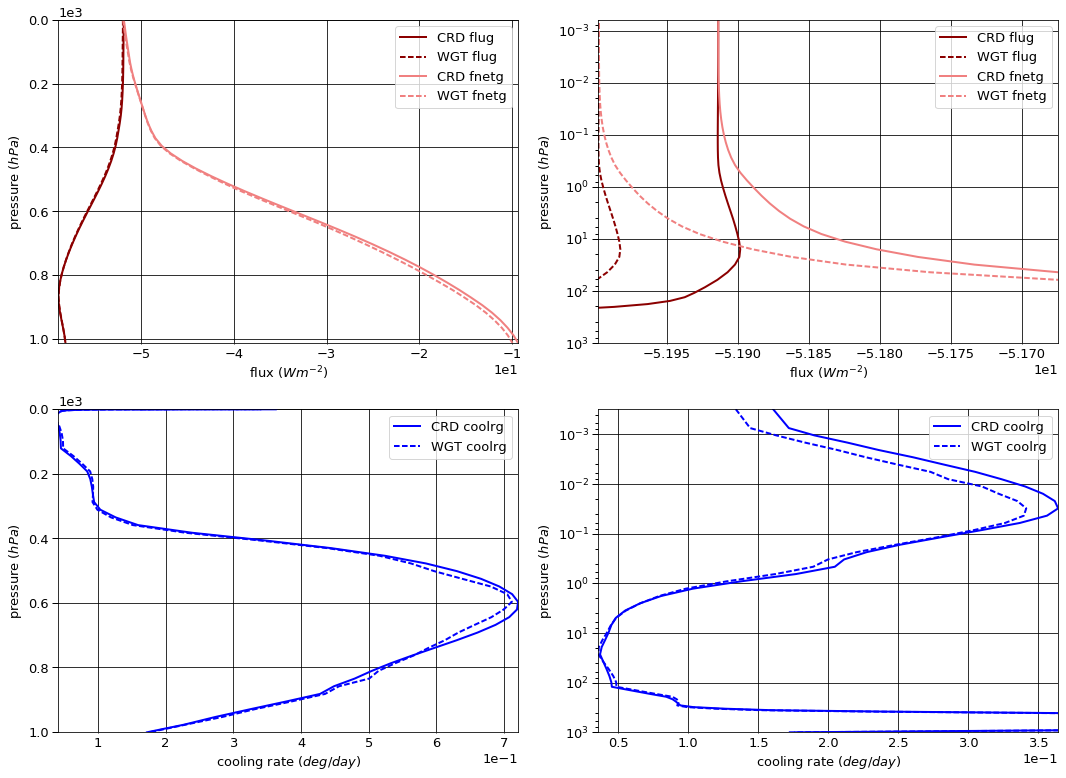

In [39]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [40]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g  pressure level                                 
1  0.0      1     -13.901474   0.000000 -13.901474
   1013.0   76    -14.107994   6.707580  -7.400414
2  0.0      1     -21.485534   0.000000 -21.485534
   1013.0   76    -22.888909  20.893913  -1.994996
3  0.0      1     -10.076164   0.000000 -10.076164
   1013.0   76    -12.035827  12.089692   0.053866
4  0.0      1      -4.693923   0.000000  -4.693923
   1013.0   76     -6.441182   6.445280   0.004098
5  0.0      1      -1.365637   0.000000  -1.365637
   1013.0   76     -2.111880   2.112670   0.000790
6  0.0      1      -0.202430   0.000000  -0.202430
   1013.0   76     -0.315301   0.315413   0.000112
7  0.0      1      -0.124885   0.000000  -0.124885
   1013.0   76     -0.198055   0.198152   0.000097
8  0.0      1      -0.031037   0.000000  -0.031037
   1013.0   76     -0.045755   0.045771   0.000017
9  0.0      1      -0.024875   0.000000  -0.024875
   1013.0   76     -0.030246   0.030258   0.000012
10 0.0      1      -0.007705   0.000000  -0.007705
   1013.0   76     -0.008381   0.008384   0.000003


WGT


flug       fldg      fnetg
g  pressure level                                 
1  0.0      1     -13.940504   0.000000 -13.940504
   1013.0   76    -14.107994   5.678520  -8.429474
2  0.0      1     -21.586589   0.000000 -21.586589
   1013.0   76    -22.888909  21.317132  -1.571777
3  0.0      1     -10.064239   0.000000 -10.064239
   1013.0   76    -12.035827  12.089862   0.054036
4  0.0      1      -4.667346   0.000000  -4.667346
   1013.0   76     -6.441182   6.443584   0.002402
5  0.0      1      -1.350021   0.000000  -1.350021
   1013.0   76     -2.111880   2.112670   0.000790
6  0.0      1      -0.202156   0.000000  -0.202156
   1013.0   76     -0.315301   0.315413   0.000112
7  0.0      1      -0.123249   0.000000  -0.123249
   1013.0   76     -0.198055   0.198129   0.000074
8  0.0      1      -0.031066   0.000000  -0.031066
   1013.0   76     -0.045755   0.045771   0.000017
9  0.0      1      -0.024720   0.000000  -0.024720
   1013.0   76     -0.030246   0.030258   0.000012
10 0.0      1      -0.007759   0.000000  -0.007759
   1013.0   76     -0.008381   0.008384   0.000003


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.039030  0.000000 -0.039030
   1013.0   76     0.000000 -1.029061 -1.029061
2  0.0      1     -0.101055  0.000000 -0.101055
   1013.0   76     0.000000  0.423219  0.423220
3  0.0      1      0.011925  0.000000  0.011925
   1013.0   76     0.000000  0.000170  0.000170
4  0.0      1      0.026577  0.000000  0.026577
   1013.0   76     0.000000 -0.001696 -0.001696
5  0.0      1      0.015616  0.000000  0.015616
   1013.0   76     0.000000  0.000000  0.000000
6  0.0      1      0.000274  0.000000  0.000274
   1013.0   76     0.000000  0.000000  0.000000
7  0.0      1      0.001636  0.000000  0.001636
   1013.0   76     0.000000 -0.000023 -0.000023
8  0.0      1     -0.000029  0.000000 -0.000029
   1013.0   76     0.000000  0.000000  0.000000
9  0.0      1      0.000155  0.000000  0.000155
   1013.0   76     0.000000  0.000000  0.000000
10 0.0      1     -0.000054  0.000000 -0.000054
   1013.0   76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      1.925867e-07
   1001.112500 75     9.957007e-02
2  0.000312    1      5.218003e-05
   1001.112500 75     8.419131e-02
3  0.000312    1      2.526570e-04
   1001.112500 75    -9.849131e-03
4  0.000312    1      3.657386e-04
   1001.112500 75    -1.160076e-03
5  0.000312    1      3.255559e-05
   1001.112500 75    -2.295726e-04
6  0.000312    1      4.071424e-07
   1001.112500 75    -3.250188e-05
7  0.000312    1      8.311951e-04
   1001.112500 75    -2.696134e-05
8  0.000312    1      3.645377e-04
   1001.112500 75    -4.887181e-06
9  0.000312    1      1.189092e-02
   1001.112500 75    -3.416523e-06
10 0.000312    1      1.467273e-01
   1001.112500 75    -8.839556e-07


WGT


coolrg
g  pressure    layer              
1  0.000312    1      1.175838e-07
   1001.112500 75     9.413217e-02
2  0.000312    1      1.866509e-05
   1001.112500 75     9.360963e-02
3  0.000312    1      1.002620e-04
   1001.112500 75    -1.104063e-02
4  0.000312    1      1.721689e-04
   1001.112500 75    -6.984439e-04
5  0.000312    1      2.835316e-05
   1001.112500 75    -2.295726e-04
6  0.000312    1      4.065675e-07
   1001.112500 75    -3.250188e-05
7  0.000312    1      7.238616e-04
   1001.112500 75    -2.155885e-05
8  0.000312    1      3.894225e-04
   1001.112500 75    -4.887181e-06
9  0.000312    1      1.054805e-02
   1001.112500 75    -3.416523e-06
10 0.000312    1      1.218816e-01
   1001.112500 75    -8.839556e-07


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -7.500292e-08
   1001.112500 75    -5.437898e-03
2  0.000312    1     -3.351494e-05
   1001.112500 75     9.418324e-03
3  0.000312    1     -1.523951e-04
   1001.112500 75    -1.191502e-03
4  0.000312    1     -1.935697e-04
   1001.112500 75     4.616321e-04
5  0.000312    1     -4.202433e-06
   1001.112500 75     0.000000e+00
6  0.000312    1     -5.748900e-10
   1001.112500 75     0.000000e+00
7  0.000312    1     -1.073335e-04
   1001.112500 75     5.402493e-06
8  0.000312    1      2.488479e-05
   1001.112500 75     0.000000e+00
9  0.000312    1     -1.342867e-03
   1001.112500 75     0.000000e+00
10 0.000312    1     -2.484564e-02
   1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-51.913663,0.000000,-51.913663
1013.0,76,-58.183530,48.847114,-9.336416



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-51.997648,0.000000,-51.997648
1013.0,76,-58.183530,48.239723,-9.943806



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.083985,0.00000,-0.083985
1013.0,76,0.000000,-0.60739,-0.607390


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.160518
1001.112500,75,0.172454



WGT


,,coolrg
pressure,layer,
0.000312,1,0.133863
1001.112500,75,0.175710



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.026655
1001.112500,75,0.003256


In [41]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.234825,0.240966
2,0.390375,0.393311
3,0.211525,0.207564
4,0.114900,0.111319
5,0.037575,0.036493
6,0.005775,0.005468
7,0.003525,0.003422
8,0.000825,0.000792
9,0.000525,0.000521


In [42]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,3.978790e-24
2,3.277820e-23
3,2.700344e-22
4,2.224606e-21
5,1.832682e-20
6,1.509806e-19
7,4.626733e-20
8,4.227122e-19
9,5.623149e-19


In [43]:
def spreadsheet():
    ng = 10
    ng_refs = [2, 2, 6]
    p_refs = [1, 10, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [44]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,3.978790e-24,NaN,0.234825,0.240966,0.234825,0.240966,500.0
2,3.277820e-23,NaN,0.390375,0.393311,0.625200,0.634277,500.0
3,2.700344e-22,8.238232,0.211525,0.207564,0.836725,0.841841,500.0
4,2.224606e-21,8.238231,0.114900,0.111319,0.951625,0.953160,500.0
5,1.832682e-20,8.238232,0.037575,0.036493,0.989200,0.989653,500.0
6,1.509806e-19,8.238232,0.005775,0.005468,0.994975,0.995120,500.0
7,4.626733e-20,0.306446,0.003525,0.003422,0.998500,0.998542,10.0
8,4.227122e-19,9.136299,0.000825,0.000792,0.999325,0.999334,10.0
9,5.623149e-19,1.330255,0.000525,0.000521,0.999850,0.999855,1.0


In [45]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

In [46]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')